In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [5]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Rings')

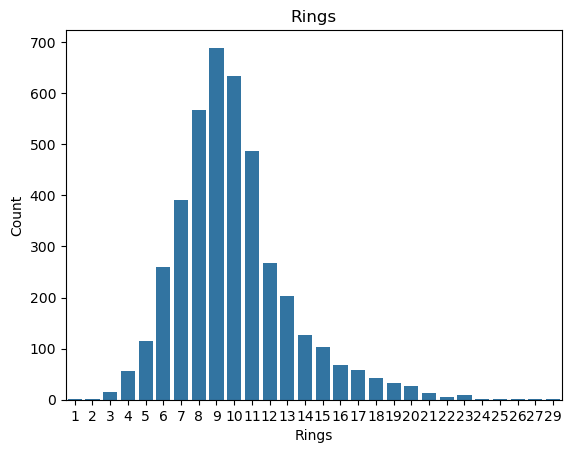

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [9]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder 객체 생성 후 라벨인코딩 수행
label_encoder = LabelEncoder()
df['Rings'] = label_encoder.fit_transform(df['Rings'])

In [13]:
df['Rings'].value_counts()

Rings
8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: count, dtype: int64

In [15]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [17]:
# 원핫 인코딩 (Sex 열만)
df_sex_encoded = pd.get_dummies(df['Sex'], prefix='Sex')

# 숫자형으로 변환
df_sex_encoded = df_sex_encoded.astype(int)

# 원래 데이터프레임과 원핫 인코딩된 데이터프레임 합치기
df = pd.concat([df.drop('Sex', axis=1), df_sex_encoded], axis=1)

In [19]:
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,14,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,6,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,8,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,9,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,10,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,9,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,8,0,0,1


In [21]:
X=df.drop('Rings',axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [23]:
y=df['Rings']
y.value_counts()

Rings
8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: count, dtype: int64

In [25]:
X = X.values
X.shape

(4177, 10)

In [27]:
# 0,1 로 표현하는 원핫인코딩
from tensorflow.keras.utils import to_categorical

Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
print(X.dtype)
print(Y.dtype)

float64
float64


In [31]:
# dtype이 맞지 않을 경우 실행
# X=X.astype('float64')
# X.dtype

In [33]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# 윈도우 크기를 설정하고, 데이터를 3차원으로 변환 (타임스텝 적용)
def create_windows(X, y, window_size):
    X_windows = []
    y_windows = []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i+window_size])  # window_size만큼의 과거 데이터를 사용
        y_windows.append(y[i+window_size])    # 그 다음 값을 예측
    return np.array(X_windows), np.array(y_windows)

In [37]:
window_size = 3  # 3개의 타임스텝을 사용
X_windows, Y_windows = create_windows(X_scaled, Y, window_size)
print (X_windows)
print (Y_windows)

[[[0.51351351 0.5210084  0.0840708  ... 0.         0.         1.        ]
  [0.37162162 0.35294118 0.07964602 ... 0.         0.         1.        ]
  [0.61486486 0.61344538 0.11946903 ... 1.         0.         0.        ]]

 [[0.37162162 0.35294118 0.07964602 ... 0.         0.         1.        ]
  [0.61486486 0.61344538 0.11946903 ... 1.         0.         0.        ]
  [0.49324324 0.5210084  0.11061947 ... 0.         0.         1.        ]]

 [[0.61486486 0.61344538 0.11946903 ... 1.         0.         0.        ]
  [0.49324324 0.5210084  0.11061947 ... 0.         0.         1.        ]
  [0.34459459 0.33613445 0.07079646 ... 0.         1.         0.        ]]

 ...

 [[0.65540541 0.6302521  0.13716814 ... 0.         0.         1.        ]
  [0.66216216 0.66386555 0.1460177  ... 1.         0.         0.        ]
  [0.69594595 0.64705882 0.11946903 ... 0.         0.         1.        ]]

 [[0.66216216 0.66386555 0.1460177  ... 1.         0.         0.        ]
  [0.69594595 0.64705882

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_windows, Y_windows, test_size=0.2, random_state=0)

In [41]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# CNN 모델 구성
model = Sequential()
# 타임스텝=3, 특성=10
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, X_train.shape[2])))  
model.add(MaxPooling1D(pool_size=1))  # MaxPooling 레이어 추가
model.add(Dropout(0.2))  # Dropout 레이어 추가

# 두 번째 Conv1D 레이어
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))  
model.add(MaxPooling1D(pool_size=1))  # MaxPooling 레이어 추가
model.add(Dropout(0.2))  # Dropout 레이어 추가

model.add(Flatten())  # Flatten 레이어 추가하여 출력형태를 변환 -> Dense 레이어와 연결하기 위해 필요
model.add(Dense(64, activation='relu'))  # Fully Connected Layer
model.add(Dropout(0.5))  # Dropout 레이어 추가

model.add(Dense(28, activation='softmax'))  # 출력층: 28개 클래스

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\82107\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.1139 - loss: 3.0542 - val_accuracy: 0.1952 - val_loss: 2.4632
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1619 - loss: 2.5836 - val_accuracy: 0.2000 - val_loss: 2.3587
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1899 - loss: 2.4866 - val_accuracy: 0.1964 - val_loss: 2.3263
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1929 - loss: 2.4175 - val_accuracy: 0.2144 - val_loss: 2.2994
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2014 - loss: 2.3794 - val_accuracy: 0.2204 - val_loss: 2.2828
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2021 - loss: 2.3271 - val_accuracy: 0.2096 - val_loss: 2.2547
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2103 - loss: 2.3354 - val_accuracy: 0.2204 - val_loss: 2.2461
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2008 - loss: 2.3422 - val_accuracy: 0

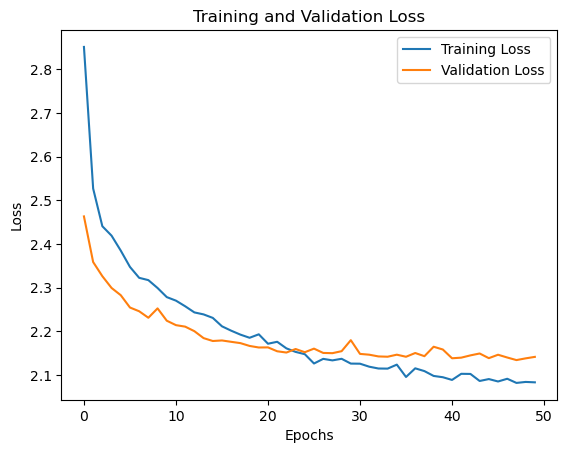

In [45]:
# Loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

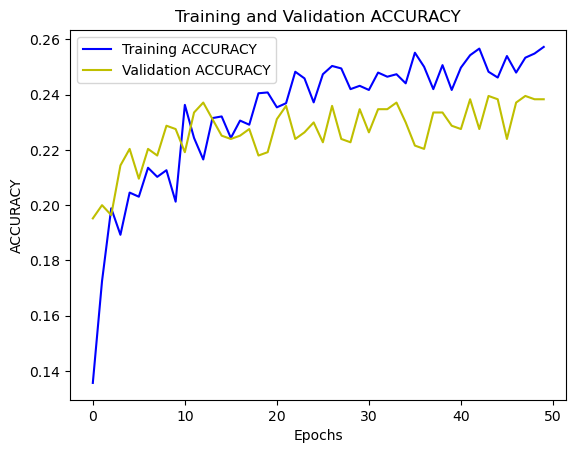

In [47]:
# 정확도
plt.plot(history.history['accuracy'], 'b', label='Training ACCURACY')
plt.plot(history.history['val_accuracy'], 'y', label='Validation ACCURACY')
plt.title('Training and Validation ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

In [49]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.25      0.11      0.15         9
           4       0.05      0.04      0.04        24
           5       0.36      0.19      0.25        52
           6       0.32      0.34      0.33        76
           7       0.34      0.35      0.34       111
           8       0.27      0.25      0.26       138
           9       0.19      0.55      0.28       126
          10       0.27      0.15      0.19       105
          11       0.00      0.00      0.00        44
          12       0.12      0.06      0.08        52
          13       0.00      0.00      0.00        29
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00        15
          17       0.00      0.00      0.00         1
          18       0.00    